<a href="https://colab.research.google.com/github/carlosfabian1984/-proyecto_integrado_1/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática",
    "Física", "Química", "Biología", "Filosofía", "Sociología"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Díaz", "Sánchez"]
nombres = ["Juan", "María", "Carlos", "Ana", "Luis", "Laura", "Pedro", "Marta", "Diego", "Elena"]


# Función para generar un número de DNI aleatorio
def generar_dni():
  return random.randint(10000000, 99999999)

# Crear una lista vacía para almacenar los datos
datos = []

# Generar datos para 100 filas
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 15)

  datos.append([apellido, nombre, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Fernández,Marta,20660162,Historia,10,8,2,11
1,López,Laura,14492068,Lengua y Literatura,5,9,5,5
2,Rodríguez,María,97108859,Química,2,10,10,6
3,Sánchez,Juan,28416995,Inglés,8,10,8,14
4,Pérez,Ana,92446387,Física,2,3,3,2
...,...,...,...,...,...,...,...,...
95,Fernández,Laura,82832813,Inglés,8,5,6,2
96,Martínez,Ana,93261706,Química,6,2,7,1
97,Sánchez,Ana,33425631,Química,8,1,3,4
98,Gómez,Diego,35712304,Biología,10,1,6,14


<ipython-input-2-bd45b1dd3ebb>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(promedio_materias.index, rotation=45, ha='right')


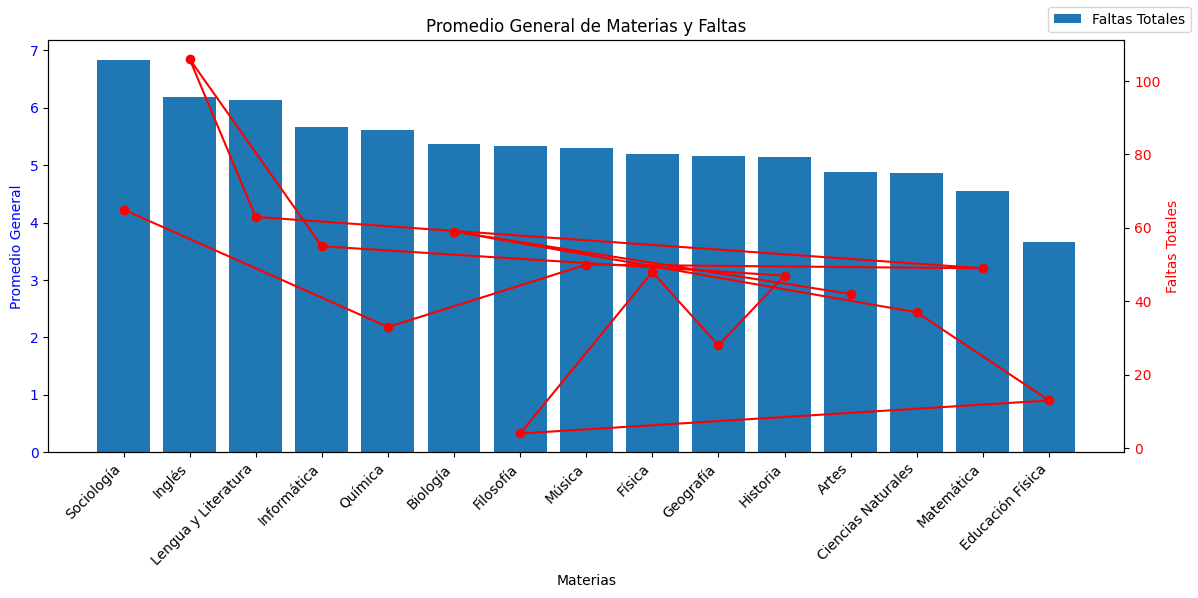

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
promedio_materias['Promedio General'] = promedio_materias.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedio_materias = promedio_materias.sort_values('Promedio General', ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia')['Faltas a clases'].sum()


# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar las barras con el promedio general de cada materia
ax1.bar(promedio_materias.index, promedio_materias['Promedio General'])
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de Materias y Faltas')
ax1.set_xticklabels(promedio_materias.index, rotation=45, ha='right')

# Crear un segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
fig.legend(['Faltas Totales'], loc='upper right')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)